#                     Project:- Red wine quality prediction   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# load the dataset and reading the first 5 rows.
wine = pd.read_csv('red_wine_quality.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#shape
wine.shape

(1599, 12)

In [5]:
#info
wine.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [6]:
#chaeck missing values

wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Exploratory Data Analysis(EDA)


In [10]:
#target varible is quality
wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

 visualizing the values

<AxesSubplot:xlabel='quality', ylabel='count'>

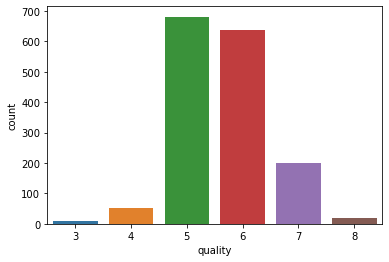

In [12]:
sns.countplot(x=wine["quality"])


In [13]:
#count all the values
wine.count

<bound method DataFrame.count of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.06

In [17]:
import seaborn as sns

<AxesSubplot:>

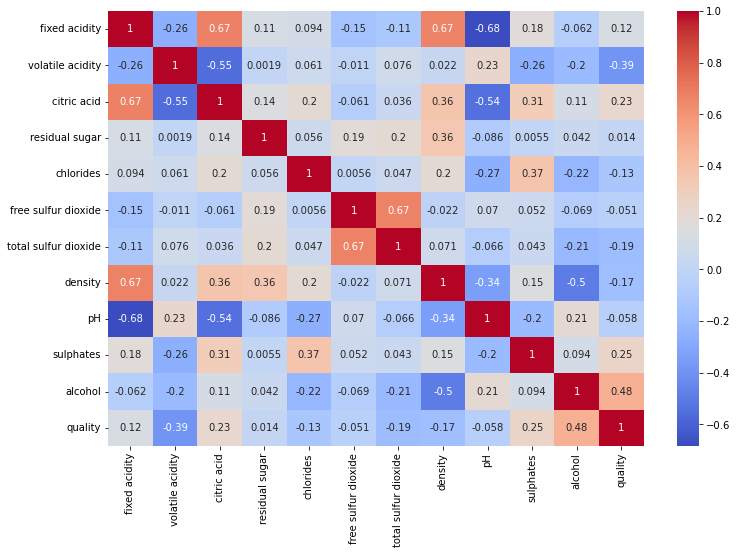

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(wine.corr(),annot=True,cmap="coolwarm")


In [24]:
 #calculate and order the correlations with respect to quality
correlations = wine.corr()["quality"].sort_values(ascending=False)
correlations

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

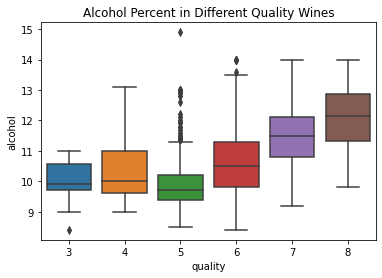

In [28]:
#Alcohol in different quality wines
alc =sns.boxplot(x="quality",y="alcohol", data=wine)
alc.set(title="Alcohol Percent in Different Quality Wines")


observation:- the quality of wines is increasing when the percent of alcohol increased

In [ ]:
#Sulphates percent in different quality wines


[Text(0.5, 1.0, 'Sulphates Percent in Different Quality Wines')]

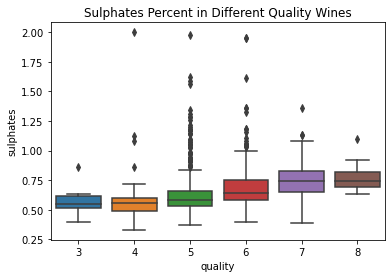

In [29]:
s =sns.boxplot(x="quality",y="sulphates", data=wine)
s.set(title="Sulphates Percent in Different Quality Wines")

observation:- light increment in the quality of wine as percent of sulphates increased

[Text(0.5, 1.0, 'Citric Acid Percent in Different Quality Wines')]

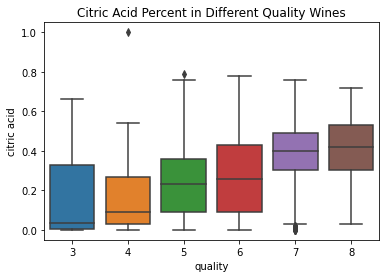

In [40]:
cit =sns.boxplot(x="quality",y="citric acid", data=wine)
cit.set(title="Citric Acid Percent in Different Quality Wines")

observation:-Adding citric acid to these wines seem to get higher quality ratings.

[Text(0.5, 1.0, 'Volatile Acidity Percent in Different Quality Wines')]

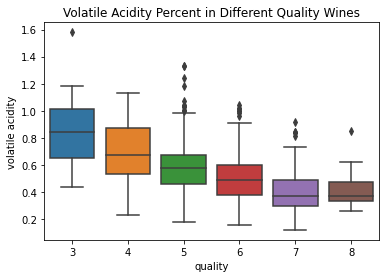

In [44]:
#Volatile acid percent in different quality wines
vol =sns.boxplot(x="quality",y="volatile acidity", data=wine)
vol.set(title="Volatile Acidity Percent in Different Quality Wines")

observation:we can clearly observe how less it is present, the wine will have high ratings

from correlation heatamp and boxplot, with all the featuresof wine we can see that volatile_acidity as it is having high correlation with quality than others

In [54]:
def get_correlation(data, threshold):
    corr_col = []
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                if col_name not in corr_col:
                    corr_col.append(col_name)
    return corr_col

In [55]:
x = wine.iloc[:,:-1]
y = wine.iloc[:,-1]


In [56]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [57]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [58]:
#importing libaries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,mean_absolute_error

In [59]:
#training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [60]:
corr_features = get_correlation(x_train,0.6)
corr_features

['citric acid', 'total sulfur dioxide', 'density', 'pH']

In [61]:
#dropping columns which are highly correlated to each other

In [62]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol
1109,10.8,0.470,2.10,0.171,27.0,0.76,10.8
1032,8.1,0.820,4.10,0.095,5.0,0.53,9.6
1002,9.1,0.290,2.05,0.063,13.0,0.84,11.7
487,10.2,0.645,1.80,0.053,5.0,0.42,10.0
979,12.2,0.450,1.40,0.075,3.0,0.63,10.4
...,...,...,...,...,...,...,...
794,10.1,0.270,2.30,0.065,7.0,0.53,12.5
813,6.9,0.390,2.10,0.102,4.0,0.58,11.4
1322,9.1,0.340,1.80,0.058,9.0,0.55,11.4
704,9.1,0.765,1.60,0.078,4.0,0.54,9.7


In [63]:
#Features scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [64]:
x_train

array([[ 0.90103398,  0.05480282,  0.9094138 , ...,  0.52091013,
        -0.22358408, -0.95579434],
       [ 1.41998736, -1.47967601,  0.9094138 , ..., -1.16841553,
        -0.68130963, -0.76727388],
       [ 0.90103398, -0.98645067,  1.4208416 , ..., -0.3237527 ,
         0.74908272,  0.17532846],
       ...,
       [-0.25219574,  0.21921126,  0.19341488, ..., -0.12883051,
         0.17692578, -0.86153411],
       [ 2.68854005, -0.32881689,  1.11398492, ..., -0.06385645,
         0.11971008,  2.15479335],
       [ 0.84337249,  2.46612668,  0.24455766, ..., -0.38872677,
        -1.0246038 , -0.95579434]])

In [65]:
y_train

642     5
679     5
473     5
390     8
1096    6
       ..
763     5
835     5
1216    6
559     6
684     5
Name: quality, Length: 1279, dtype: int64

# Linear Regression

In [66]:
# fit the model
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [67]:
# predict using x_test values
y_pred = linear_reg.predict(x_test)
print(y_pred)
y_pred = np.round(y_pred)

[5.76385478 4.98006946 6.64102493 5.27480699 5.93051034 4.95805557
 5.35105778 6.0594488  4.76558558 4.89268871 5.24932617 5.36800084
 5.68031947 5.0197175  5.51062764 6.41821707 6.83304011 5.71301548
 5.92193484 5.05501536 6.31417929 5.12991229 5.60598355 6.16576906
 5.4803782  4.93702179 5.13198248 6.51165656 5.29938172 6.28012667
 6.04884564 5.8237069  5.54373934 5.25886212 5.67621688 6.17757069
 5.13017354 5.52654811 6.39221706 5.75787899 5.39872148 6.06137627
 6.68743062 6.63429619 5.95888107 4.69146177 5.46197404 6.01848535
 5.46398874 6.10714487 5.30188276 5.27369029 5.79126048 6.34779126
 5.73410733 5.20017687 5.02744333 5.27115977 6.52689639 5.43550358
 5.14677243 5.74906082 6.04569753 6.26498692 5.02770371 6.12493522
 5.30526479 6.00106148 6.12865961 5.95517256 5.2948336  5.47729398
 4.9938974  5.55870363 5.59846992 6.22759332 5.37672307 5.28182758
 5.73271578 6.33180342 5.68078348 5.263103   5.903888   6.07235053
 5.46630304 5.34664952 6.23683579 4.99751831 5.29853871 4.9154

In [68]:
# Evaluation of the model
print('Mean Absolute Error     : ',mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_absolute_error(y_test,y_pred)))


Mean Absolute Error     :  0.390625
Root Mean Squared Error :  0.625


<AxesSubplot:>

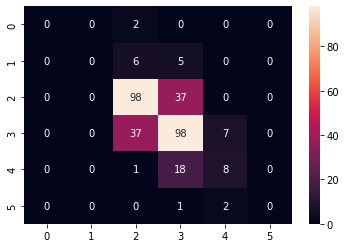

In [91]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True)

# Decision Tree Regressor


In [69]:
dtr = DecisionTreeRegressor(random_state=142)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(random_state=142)

In [71]:
y_pred_dtr = dtr.predict(x_test)
print(y_pred_dtr)
y_pred_dtr = np.round(y_pred_dtr)

[5. 6. 7. 5. 4. 6. 6. 6. 6. 5. 5. 5. 6. 5. 5. 5. 7. 5. 5. 5. 7. 5. 6. 5.
 6. 5. 5. 6. 5. 7. 6. 7. 5. 5. 6. 7. 5. 6. 7. 5. 5. 6. 6. 7. 6. 5. 5. 6.
 4. 7. 6. 6. 6. 8. 5. 5. 5. 5. 7. 6. 5. 6. 6. 6. 5. 6. 5. 5. 7. 7. 6. 6.
 4. 5. 6. 6. 6. 6. 5. 7. 6. 5. 7. 6. 6. 5. 4. 5. 6. 5. 5. 6. 5. 5. 5. 6.
 7. 4. 5. 6. 6. 5. 6. 5. 5. 5. 5. 5. 6. 5. 6. 5. 6. 5. 5. 6. 5. 6. 7. 6.
 5. 5. 5. 5. 6. 6. 5. 6. 6. 6. 5. 6. 6. 6. 6. 5. 6. 5. 6. 5. 6. 6. 5. 5.
 5. 6. 6. 6. 5. 5. 5. 5. 5. 5. 6. 6. 4. 6. 4. 6. 6. 6. 6. 5. 5. 5. 6. 6.
 6. 6. 6. 5. 5. 7. 6. 6. 7. 7. 7. 5. 4. 7. 6. 6. 6. 6. 5. 6. 5. 5. 6. 6.
 6. 5. 5. 5. 5. 5. 5. 5. 5. 6. 5. 6. 3. 5. 5. 7. 6. 6. 5. 6. 5. 7. 5. 6.
 6. 6. 6. 5. 5. 5. 6. 6. 5. 6. 6. 7. 6. 6. 5. 6. 6. 5. 6. 6. 6. 7. 7. 6.
 5. 6. 5. 5. 7. 5. 5. 5. 5. 6. 5. 5. 5. 4. 4. 5. 5. 5. 6. 7. 5. 6. 5. 6.
 6. 5. 5. 5. 5. 6. 5. 5. 6. 6. 7. 6. 6. 5. 6. 5. 5. 6. 5. 6. 6. 5. 6. 5.
 7. 4. 5. 5. 6. 6. 6. 6. 6. 6. 6. 5. 6. 5. 5. 5. 6. 6. 6. 5. 5. 5. 5. 6.
 5. 4. 5. 5. 6. 6. 5. 7.]


In [72]:
# Evaluation of the model
print('Mean Absolute Error     : ',mean_absolute_error(y_test, y_pred_dtr))
print('Root Mean Squared Error : ',np.sqrt(mean_absolute_error(y_test,y_pred_dtr)))

Mean Absolute Error     :  0.465625
Root Mean Squared Error :  0.6823672031978091


<AxesSubplot:>

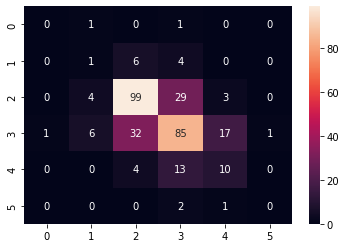

In [87]:
cf_matrix = confusion_matrix(y_test, y_pred_dtr)
sns.heatmap(cf_matrix, annot = True)

# Random Forest Regressor


In [73]:
rfr = RandomForestRegressor(n_estimators=10,random_state = 1)
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [74]:
y_pred_rfr = rfr.predict(x_test)
print(y_pred_rfr)
y_pred_rfr = np.round(y_pred_rfr)

[5.5 4.7 6.9 4.8 5.  5.4 5.3 5.9 4.9 5.3 5.1 5.4 5.7 4.7 5.6 5.9 7.1 4.9
 5.5 5.1 6.1 5.5 5.5 6.1 5.7 4.9 5.5 6.7 5.  6.5 5.7 5.6 5.7 5.3 6.  6.6
 5.1 5.9 6.  5.7 5.1 6.4 6.6 6.5 6.  4.7 5.  5.8 5.5 6.  5.  5.3 5.6 6.2
 5.5 5.  5.2 5.2 6.8 5.5 5.3 5.5 5.8 6.  5.2 6.2 5.2 5.  6.4 6.3 5.5 5.5
 4.5 5.1 5.8 6.  5.1 5.1 5.  6.2 5.6 4.9 5.5 5.7 5.6 5.6 5.5 5.  5.4 5.1
 5.  5.3 6.  5.  5.4 5.5 6.3 4.8 5.6 5.4 6.9 5.9 5.9 5.5 5.1 4.6 5.1 5.3
 6.  5.  6.  5.1 7.3 5.5 5.7 5.5 4.9 6.7 5.8 5.5 5.2 5.5 5.3 4.8 7.  6.3
 5.2 4.9 5.6 6.5 5.5 5.1 6.2 6.1 5.9 5.  5.6 5.2 6.  5.8 5.8 5.  5.  5.5
 5.4 5.7 7.3 5.9 5.7 5.  6.2 5.6 5.3 5.1 5.8 5.6 5.6 4.8 6.2 5.4 5.5 5.6
 6.8 5.3 5.1 4.9 5.9 6.3 5.9 5.9 6.  5.1 4.9 6.9 5.1 6.5 5.9 6.9 6.8 4.8
 5.5 6.9 5.6 6.4 6.3 5.2 5.2 5.9 5.4 5.6 6.1 5.4 5.5 5.5 5.4 5.1 5.1 5.5
 5.8 5.3 5.  6.2 5.5 5.4 5.4 5.4 5.  6.5 6.2 5.4 5.9 6.2 5.  6.4 4.7 5.6
 5.2 6.4 6.  5.3 5.2 5.9 6.7 5.6 5.4 6.2 6.2 6.3 5.7 5.5 5.4 5.9 5.  5.5
 6.2 5.8 6.  7.  6.4 6.  5.2 5.4 5.  4.9 5.7 5.1 5.

In [76]:
# Evaluation of the model
print('Mean Absolute Error     : ',mean_absolute_error(y_test, y_pred_rfr))
print('Root Mean Squared Error : ',np.sqrt(mean_absolute_error(y_test,y_pred_rfr)))

Mean Absolute Error     :  0.309375
Root Mean Squared Error :  0.5562148865321748


In [77]:
#Accuracy of Random Forest Regressor Model
acc_score_rfr = round(accuracy_score(y_test, y_pred_rfr)*100,2)
print("Accuracy of the Random Forest Regressor model = ",acc_score_rfr,"%")

Accuracy of the Random Forest Regressor model =  72.5 %


<AxesSubplot:>

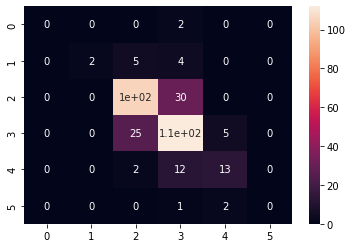

In [85]:
cf_matrix = confusion_matrix(y_test, y_pred_rfr)
sns.heatmap(cf_matrix, annot = True)

# SVM Regressor


In [80]:
svr = SVR(kernel="rbf")
svr.fit(x_train, y_train)

SVR()

In [81]:
y_pred_svr = svr.predict(x_test)
print(y_pred_svr[:100])
y_pred_svr = np.round(y_pred_svr)

[5.17903702 5.14845317 7.10553887 4.77456949 6.0338929  5.16703022
 5.03361104 5.9318447  5.17021596 5.03451175 4.94984288 5.36705622
 5.55486934 5.32042706 5.44837764 6.31816611 6.94421334 5.26576673
 5.37811434 5.3263166  6.03088053 5.27677591 5.68925241 5.69316222
 5.44156445 5.16947347 5.16295796 6.87048635 4.98567844 6.01909674
 5.82482559 5.88416724 5.63132275 5.47272656 5.99189559 5.98368405
 5.29160653 5.89443767 6.16048378 5.91066517 5.18236269 6.81597414
 6.40340408 6.54264366 5.91399365 5.10468599 5.07560749 5.74144969
 5.0597736  5.87354451 4.82637864 5.1466579  6.17091853 6.24679156
 5.48866614 5.2057999  4.92373067 5.06374203 6.80404349 5.6594908
 5.08388336 5.85821204 6.05680266 5.6944063  5.11920099 6.18730731
 5.09774827 5.14551783 6.33015738 6.13570689 5.24542807 5.25924317
 4.91065093 5.22311425 5.57865288 5.96474834 5.34650563 5.05062565
 4.98727921 6.59758146 5.49725695 5.1065959  5.81876333 5.78514356
 5.49382082 5.71047887 6.01983915 4.81376262 5.41304854 4.89960

In [82]:
# Evaluation of the model
print('Mean Absolute Error     : ',mean_absolute_error(y_test, y_pred_svr))
print('Root Mean Squared Error : ',np.sqrt(mean_absolute_error(y_test,y_pred_svr)))

Mean Absolute Error     :  0.390625
Root Mean Squared Error :  0.625


In [84]:
#Accuracy of SVM Regressor Model
acc_score_svr = round(accuracy_score(y_test, y_pred_svr)*100,2)
print("Accuracy of the SVM Regressor model = ",acc_score_svr,"%")

Accuracy of the SVM Regressor model =  63.75 %


<AxesSubplot:>

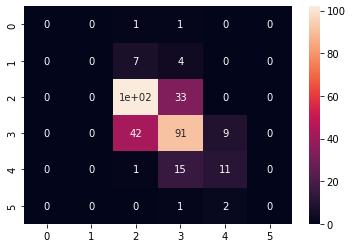

In [92]:
cf_matrix = confusion_matrix(y_test, y_pred_svr)
sns.heatmap(cf_matrix, annot = True)

conclusion from all the algorithm used:_"RANDOM FOREST REGRESSOR predicted the QUALITY OF RED WINE with highest accuracy i,e 72.5%"
    